In [3]:
import torch
from torch import nn, optim
from torch.nn import functional as F
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

from utils import get_datasets

from visualization_util_model import VisualizerUtilModelFull

In [4]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 300)
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import random


data_path = '../bbbc021/singlecell/singh_cp_pipeline_singlecell_images'
dapi_name = 'Week10_200907_B02_s1_w18E215662-2CF7-4739-93F3-DBD0C40B78DB.tif'
actin_name = 'Week10_200907_B02_s1_w436D0A3BC-098D-4271-B5AA-361CA0A7DC88.tif'
tubulin_name = 'Week10_200907_B02_s1_w2D492FCE4-15C2-4C66-99A5-E2235A93A3CC.tif'

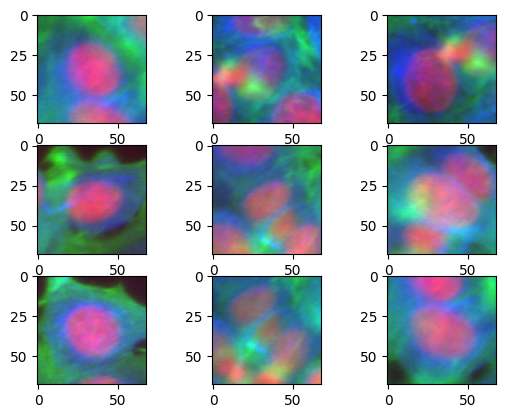

In [11]:
# def show_img():
#     np.load(os.path.join(single_img_path, dapi_name[:-4], dapi_name[:-4]+'_{}.npy'.format(idx[(i-1)*3+j])))
get_dapi_at = lambda  idx: os.path.join(data_path,dapi_name[:-4],dapi_name[:-4]+'_{idx}.npy').format(idx=idx)
get_actin_at = lambda  idx: os.path.join(data_path,actin_name[:-4],actin_name[:-4]+'_{idx}.npy').format(idx=idx)
get_tubulin_at = lambda  idx: os.path.join(data_path,tubulin_name[:-4],tubulin_name[:-4]+'_{idx}.npy').format(idx=idx)



fig, axs = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        x = np.load(get_dapi_at(i*5+j))
        axs[i, j].imshow(x/x.max(axis=(0,1)))

plt.show()

In [10]:
# which visualization operation to run
# ["embed","{{START}}","{{END}}"] => write .tsv files with embeddings and labels for batch_idx in range (START, END)
# ["recon","{{START}}","{{END}}"] => plot original images next to reconstruction
# ""

dataset = "cell"
epochs = 200
kernel_size = '32,32,68,68' # parameters
hidden_size = 400
latent_size = 200
learning_rate = 0.001
device = torch.device('cuda')
alpha = 0.5 ## DEFAULT
log_interval = -1
normalize = False ## DEFAULT
flatten = False ## DEFAULT

#Load datasets
batch_size = 32
# train_loader, test_loader, (width, height, channels) = get_datasets(dataset,
#                                                                     batch_size,
#                                                                     device)

width, height, channels = 68,68,3

visualizer = VisualizerUtilModelFull(dataset, width, height, channels, 
                                kernel_size, hidden_size, latent_size, learning_rate,
                                alpha, device, log_interval, normalize, flatten)

#Set reproducibility seed
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)

[3, 32, 32, 68, 68] ********


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:


if viz_type=="embed":
    for batch_idx, (batch,y) in enumerate(train_loader,START):
        if batch_idx > END:
            break
        data = visualizer.transform(batch).to(visualizer.device)
        # pdb.set_trace()
        visualizer.encode_and_write(data,y)
        # pdb.set_trace()
elif viz_type=="recon":
    for batch_idx, (batch,y) in enumerate(train_loader,START):
        if batch_idx > END:
            break
        data = visualizer.transform(batch).to(visualizer.device)
        # pdb.set_trace()
        visualizer.decode_and_write(data)